# InvokeAI Client - Walkthrough

This notebook demonstrates how to use the InvokeAI client to generate images.

1. **Health Check** - Verify InvokeAI is reachable
2. **Text-to-Image** - Generate an image from a text prompt
3. **Reference Image** - Upload a reference image and generate a variation
4. **Save to Disk** - Save generated images locally

## Setup

In [1]:
import sys
sys.path.insert(0, '/app')

import nest_asyncio
nest_asyncio.apply()

import asyncio
from pathlib import Path
from IPython.display import Image, display

## 1. Health Check

First, let's verify the InvokeAI service is running and reachable.

In [2]:
from src.clients.invokeai import (
    check_invokeai_health,
    generate_image,
    generate_image_with_reference,
    upload_image,
    DEFAULT_INVOKEAI_URL,
)

async def check_health():
    return await check_invokeai_health()

is_healthy = asyncio.get_event_loop().run_until_complete(check_health())
print(f"InvokeAI URL: {DEFAULT_INVOKEAI_URL}")
print(f"InvokeAI healthy: {is_healthy}")

InvokeAI URL: http://192.168.5.173:9090
InvokeAI healthy: True


## 2. Text-to-Image Generation

Generate an image from a text prompt using the FLUX 2 Klein model.
The default settings use 16 denoising steps at 1024x1024.

Image name: eb154295-bc18-4476-93e2-fb30bbd96678.png
Dimensions: 1024x1024
Size: 1590646 bytes


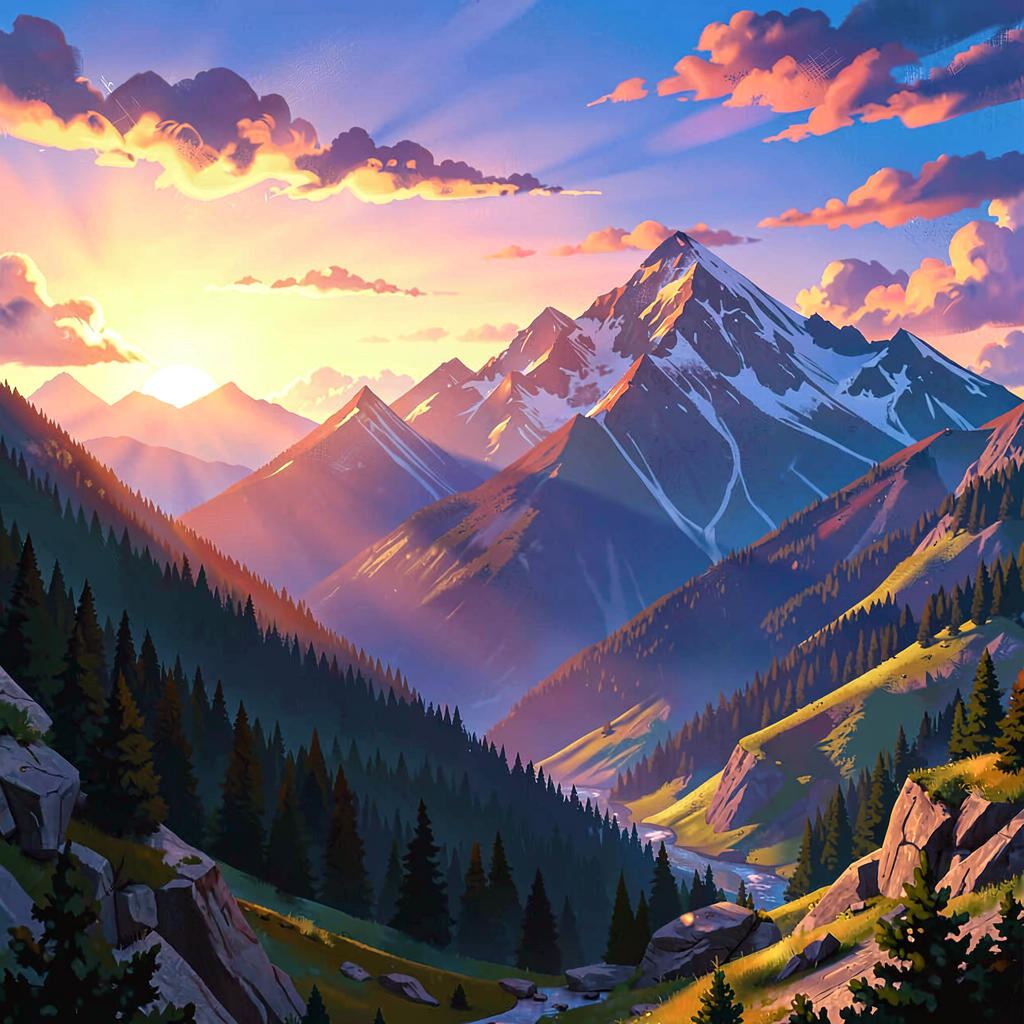

In [3]:
async def text_to_image():
    result = await generate_image(
        prompt="a serene mountain landscape at sunset, vibrant colors, digital art",
        width=1024,
        height=1024,
        num_steps=16,
    )
    return result

result = asyncio.get_event_loop().run_until_complete(text_to_image())
print(f"Image name: {result.image_name}")
print(f"Dimensions: {result.width}x{result.height}")
print(f"Size: {len(result.image_bytes)} bytes")

# Display the image inline
display(Image(data=result.image_bytes))

## 3. Save to Disk

Save the generated image to the media directory.

In [5]:
output_dir = Path("/app/media/invokeai_samples")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / f"{result.image_name}"
output_path.write_bytes(result.image_bytes)
print(f"Saved to: {output_path}")

Saved to: /app/media/invokeai_samples/eb154295-bc18-4476-93e2-fb30bbd96678.png


## 4. Portrait Dimensions

Generate a portrait-oriented image (useful for short-form video frames).

Image: 85c413ab-1077-4e3e-9d54-c8b4e48b7c70.png (768x1024)


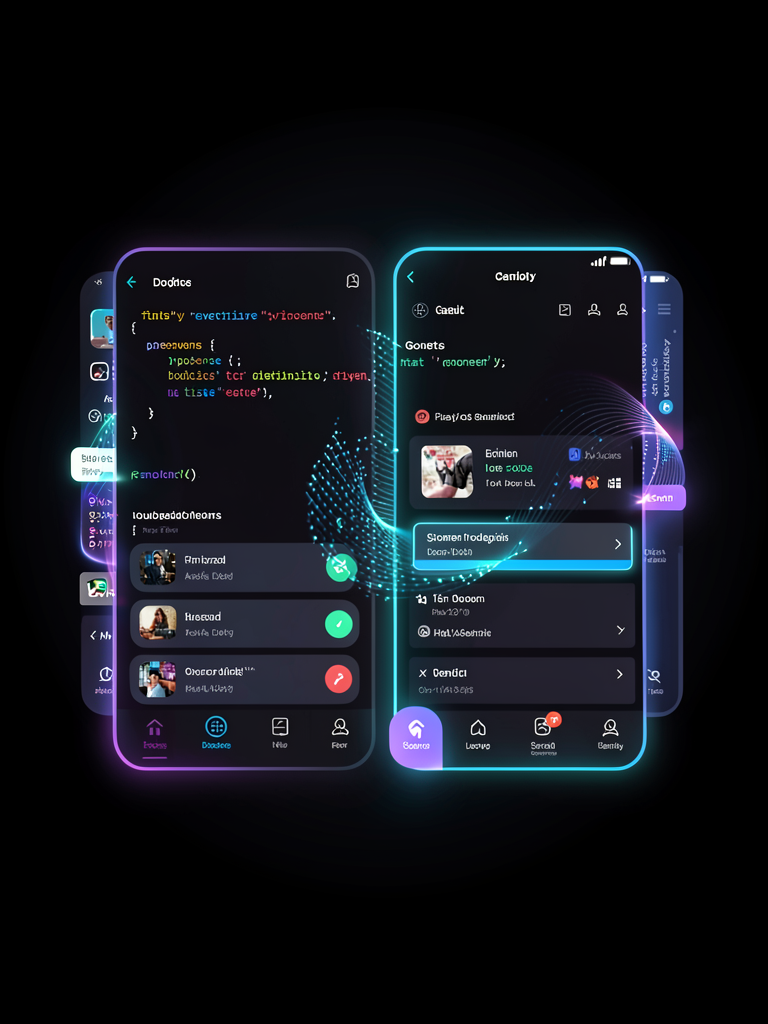

In [6]:
async def portrait_image():
    return await generate_image(
        prompt="abstract neon visualization of code transforming into a sleek app interface, dark background",
        width=768,
        height=1024,
        num_steps=16,
    )

portrait_result = asyncio.get_event_loop().run_until_complete(portrait_image())
print(f"Image: {portrait_result.image_name} ({portrait_result.width}x{portrait_result.height})")
display(Image(data=portrait_result.image_bytes))

## 5. Reference Image Generation

Upload a reference image, then generate a new image guided by it using FLUX Kontext conditioning.
This is useful for style transfer or generating variations of an existing image.

Reference-guided image: 9c76162f-4c3f-4102-85fa-b5c614e09fab.png


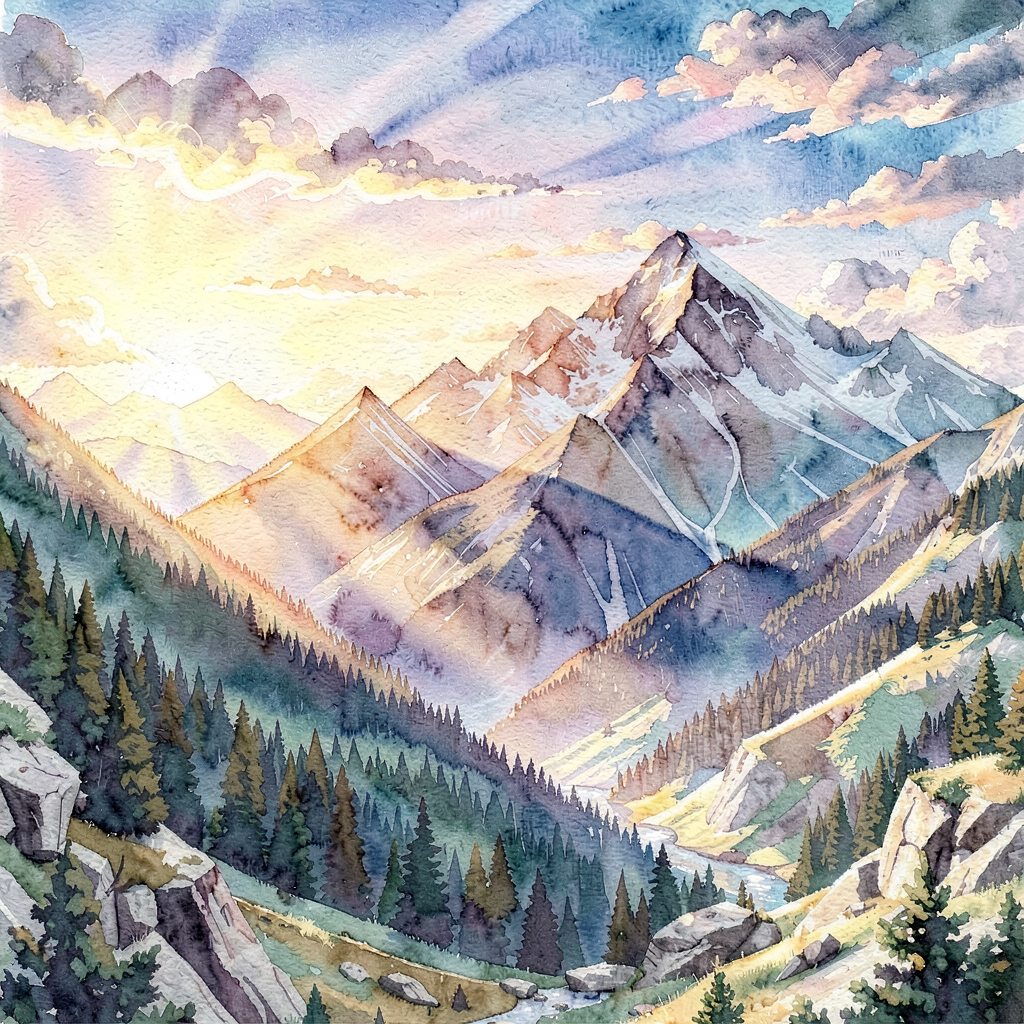

In [7]:
# First, use the image we generated above as a reference
# (In production, you'd upload your own image with upload_image())

async def ref_image_generation():
    # The image we generated above is already in InvokeAI,
    # so we can reference it by name directly.
    return await generate_image_with_reference(
        prompt="watercolor painting style",
        reference_image_name=result.image_name,
        width=1024,
        height=1024,
        num_steps=16,
    )

ref_result = asyncio.get_event_loop().run_until_complete(ref_image_generation())
print(f"Reference-guided image: {ref_result.image_name}")
display(Image(data=ref_result.image_bytes))

## 6. Upload a Local Image

Upload an image from disk to InvokeAI (e.g., a project screenshot) for use as a reference.

In [8]:
# Example: upload a screenshot from the media directory
# Uncomment and adjust the path to try it:

# screenshot_path = Path("/app/media/screenshots/1.jpg")
# if screenshot_path.exists():
#     async def upload_screenshot():
#         image_bytes = screenshot_path.read_bytes()
#         return await upload_image(image_bytes, filename="screenshot.jpg")
#
#     uploaded_name = asyncio.get_event_loop().run_until_complete(upload_screenshot())
#     print(f"Uploaded as: {uploaded_name}")
#
#     # Now generate a variation
#     async def variation():
#         return await generate_image_with_reference(
#             prompt="stylized digital illustration",
#             reference_image_name=uploaded_name,
#         )
#     var_result = asyncio.get_event_loop().run_until_complete(variation())
#     display(Image(data=var_result.image_bytes))
# else:
#     print(f"No screenshot found at {screenshot_path}")

print("Uncomment the code above to try uploading a local image.")

Uncomment the code above to try uploading a local image.


## Next Steps

- See `src/clients/invokeai.py` for the full client API
- The client will be used by the short-form video workflow to generate scene images
- Images are stored on the InvokeAI board: `d5f9e3ae-df06-451f-b538-4bb58a6cc43e`